In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [3]:
#datos para predecir si un billete es falso o auténtico
bank=pd.read_csv("Banknote.csv")
bank.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [4]:
from sklearn.cluster import KMeans

#llevar los datos a arreglos, es decir, usar np
V1=bank["V1"]
V2=bank["V2"]
data=np.column_stack((V1, V2))
print(data)

[[  3.6216    8.6661 ]
 [  4.5459    8.1674 ]
 [  3.866    -2.6383 ]
 ...
 [ -3.7503  -13.4586 ]
 [ -3.5637   -8.3827 ]
 [ -2.5419   -0.65804]]


In [5]:
kmedia=KMeans(n_clusters=2).fit(data)


In [6]:
#notar la estibilidad de los centroides después de ejecutar varias veces
kmedia.cluster_centers_ #estos son los centroides


array([[ 0.86960048,  6.12717909],
       [-0.12376677, -3.45591265]])

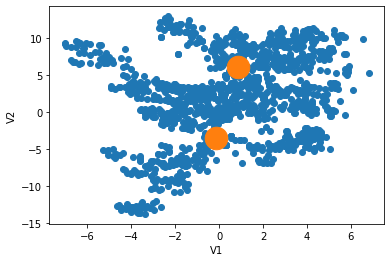

In [7]:
#dispersión con los centroides
clusters=kmedia.cluster_centers_
plt.xlabel("V1")
plt.ylabel("V2")
plt.scatter(V1,V2)
plt.scatter(clusters[:,0],clusters[:,1], s=510)

In [8]:
prediccion = kmedia.fit_predict(bank)


In [9]:
prediccion

array([1, 1, 0, ..., 0, 0, 0])

In [10]:
dato_filtrado=bank[prediccion==0] #si está en la clase 0
dato_filtrado.head()

,V1,V2
2,3.86600,-2.6383
4,0.32924,-4.4552
7,2.09220,-6.8100
11,3.98990,-2.7066
15,4.67650,-3.3895


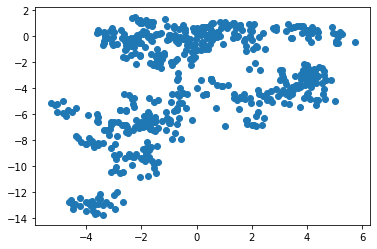

In [11]:
plt.scatter(dato_filtrado["V1"] , dato_filtrado["V2"])


In [12]:
dato_filtrado2=bank[prediccion==1] #si está en la clase 1
dato_filtrado2.head()

,V1,V2
0,3.6216,8.6661
1,4.5459,8.1674
3,3.4566,9.5228
5,4.3684,9.6718
6,3.5912,3.0129


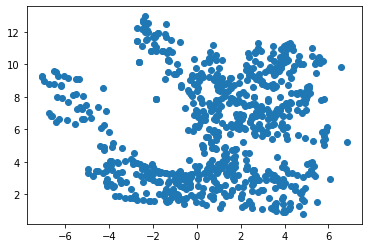

In [13]:
plt.scatter(dato_filtrado2["V1"] , dato_filtrado2["V2"])

Text(0, 0.5, 'V2')

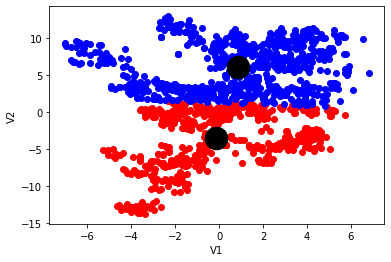

In [14]:
plt.scatter(dato_filtrado["V1"] , dato_filtrado["V2"], color="red")
plt.scatter(dato_filtrado2["V1"] , dato_filtrado2["V2"], color="blue")
plt.scatter(clusters[:,0],clusters[:,1], s=510, color="black")
plt.xlabel("V1")
plt.ylabel("V2")
#plt.legend()

Se interpreta que los puntos azules son datos que presentan autenticidad en los billetes y los puntos rojos representan billetes falsos.